# View the result of many simulations

In [129]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [130]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [131]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [132]:
#import seaborn as sns

In [133]:
#import statsmodels
#from scipy.stats.stats import pearsonr
#from sklearn.metrics import matthews_corrcoef

In [134]:
#dir(matthews_corrcoef)

In [135]:
from scipy.stats.stats import pearsonr
#help(pearsonr)

In [136]:
from scipy.stats import linregress

# config LSST

In [137]:
all_filternum = {'u':1, 'g':2, 'r':3, 'i':4, 'z':5, 'y':6}
all_filtercolors = {'u':'b', 'g':'g', 'r':'r', 'i':'y', 'z':'grey', 'y':'k'}
all_filtername= ['u','g','r','i','z','y']

In [138]:
NBFILT=len(all_filternum)

# Input Data

In [139]:
path_data="/sps/lsst/data/PCWG_MiniDataChallenge/pickles_uvk/2018-07-08/"

In [140]:
dirs = os.listdir(path_data)

In [141]:
selected_files = []
for thefile in dirs:
    if thefile.find("info")!=-1:
        selected_files.append(thefile)

In [142]:
selected_files.sort()


In [143]:
#selected_files

In [144]:
all_data = []
for thefile in selected_files:
    thefullfilename=os.path.join(path_data,thefile)
    data=np.loadtxt(thefullfilename)
    all_data.append(data)

In [145]:
all_data[0].shape

(912, 8)

In [146]:
sed_idx=0

In [147]:
data=all_data[0]

# data field
| airmass    |    filter(1..6)  |  vaod   |  o3   |   pwv  |   clouds    |    instrum-mag (ADU) |       error-mag |

In [148]:
df=pd.DataFrame(data)

In [149]:
df.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

airmass=1.22 $\pm$ 0.13


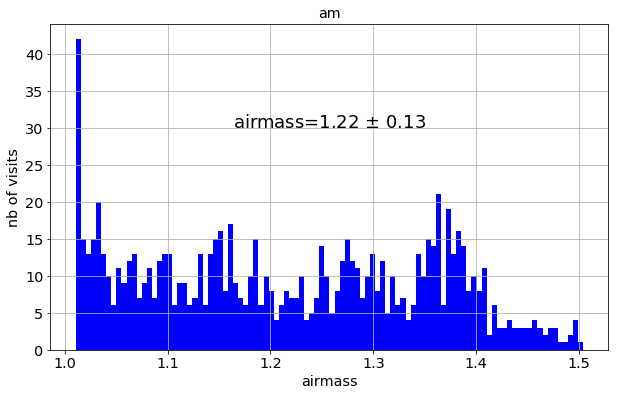

In [178]:
m,sig,zmin,zmax=df["am"].describe()["mean"],df["am"].describe()["std"],df["am"].describe()["min"],df["am"].describe()["max"]
thelabel="airmass={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist("am",bins=100,color='b',label=thelabel)
#axarr = frame.hist(column='Age', by = 'Survived', sharex=True, sharey=True, layout = (2, 1))

for ax in axarr.flatten():
    ax.set_xlabel("airmass")
    ax.set_ylabel("nb of visits")
    ax.text((zmin+zmax)/2., 30, thelabel, ha='center',fontsize=18)
print(thelabel)

In [203]:
N_u,N_g,N_r=df["f"][df.f==1].describe()["count"],df["f"][df.f==2].describe()["count"],df["f"][df.f==3].describe()["count"]
N_i,N_z,N_y=df["f"][df.f==4].describe()["count"],df["f"][df.f==5].describe()["count"],df["f"][df.f==6].describe()["count"]


In [204]:
Nobs=np.array([N_u,N_g,N_r,N_i,N_z,N_y])
print(Nobs.sum())

912.0


/sps/lsst/software/lsst_sims/sims_2_7_0/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


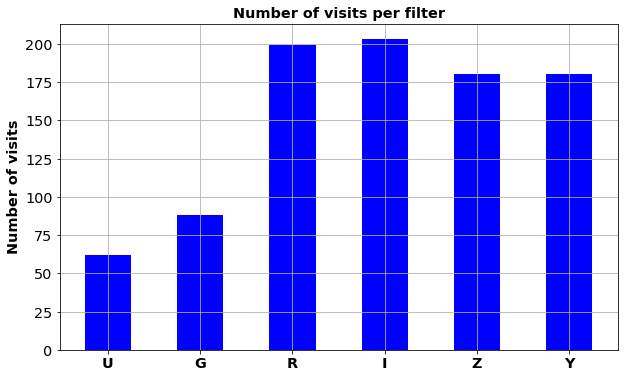

In [210]:
ind = np.arange(6)  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind , Nobs, width, color='Blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of visits',fontweight='bold')
ax.set_title('Number of visits per filter',fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
#ax.legend()
plt.grid()

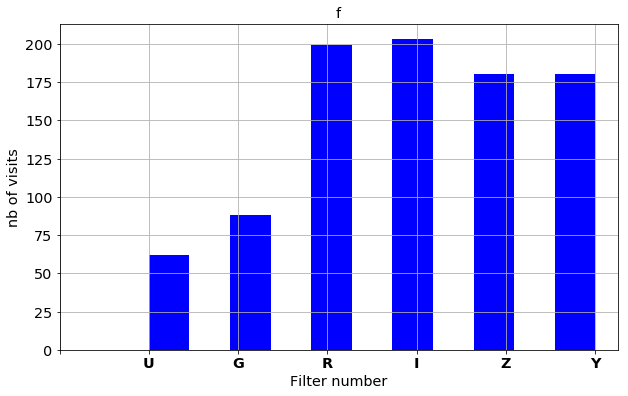

In [209]:


axarr=df.hist("f",bins=11,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("Filter number")
    ax.set_ylabel("nb of visits")
    ax.set_xticks(np.arange(7))
    ax.set_xticklabels((' ','U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')

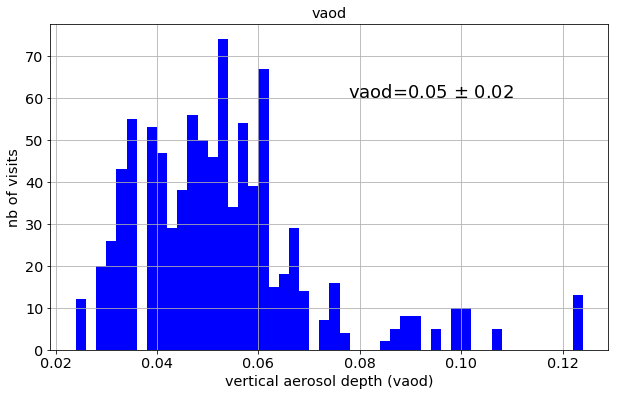

In [181]:
m,sig,amin,amax=df["vaod"].describe()["mean"],df["vaod"].describe()["std"],df["vaod"].describe()["min"],df["vaod"].describe()["max"]
thelabel="vaod={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('vaod',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("vertical aerosol depth (vaod)")
    ax.set_ylabel("nb of visits")
    ax.text((amin+amax)/2.+0.02, 60, thelabel, ha='center',fontsize=18)

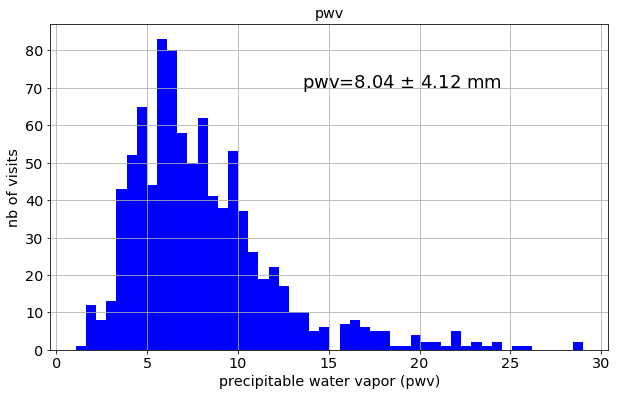

In [184]:
m,sig,pmin,pmax=df["pwv"].describe()["mean"],df["pwv"].describe()["std"],df["pwv"].describe()["min"],df["pwv"].describe()["max"]
thelabel="pwv={:3.2f} $\pm$ {:3.2f} mm".format(m,sig)
axarr=df.hist('pwv',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("precipitable water vapor (pwv) in mm")
    ax.set_ylabel("nb of visits")
    ax.text((pmin+pmax)/2.+4, 70, thelabel, ha='center',fontsize=18)

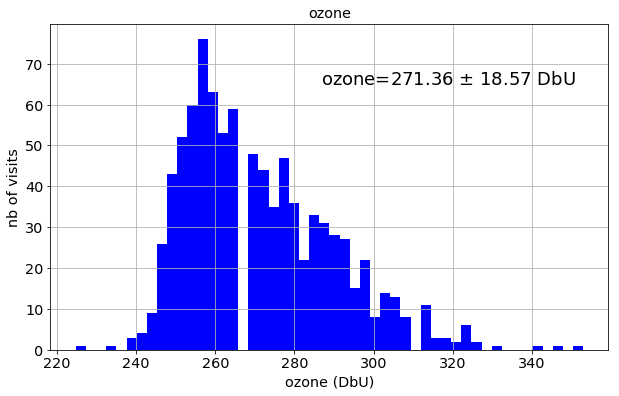

In [188]:
m,sig,omin,omax=df["ozone"].describe()["mean"],df["ozone"].describe()["std"],df["ozone"].describe()["min"],df["ozone"].describe()["max"]
thelabel="ozone={:3.2f} $\pm$ {:3.2f} DbU".format(m,sig)
axarr=df.hist('ozone',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("ozone (DbU)")
    ax.set_ylabel("nb of visits")
    ax.text((omin+omax)/2.+30, 65, thelabel, ha='center',fontsize=18)

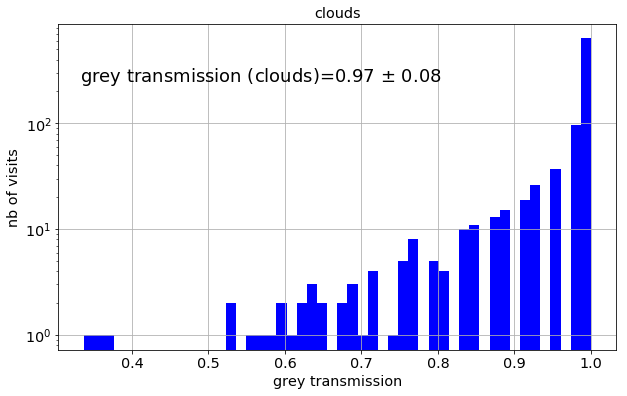

In [194]:
m,sig,cmin,cmax=df["clouds"].describe()["mean"],df["clouds"].describe()["std"],df["clouds"].describe()["min"],df["clouds"].describe()["max"]
thelabel="grey transmission (clouds)={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('clouds',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("grey transmission")
    ax.set_ylabel("nb of visits")
    ax.set_yscale('log')
    ax.text((cmin+cmax)/2.-0.1, 250, thelabel, ha='center',fontsize=18)

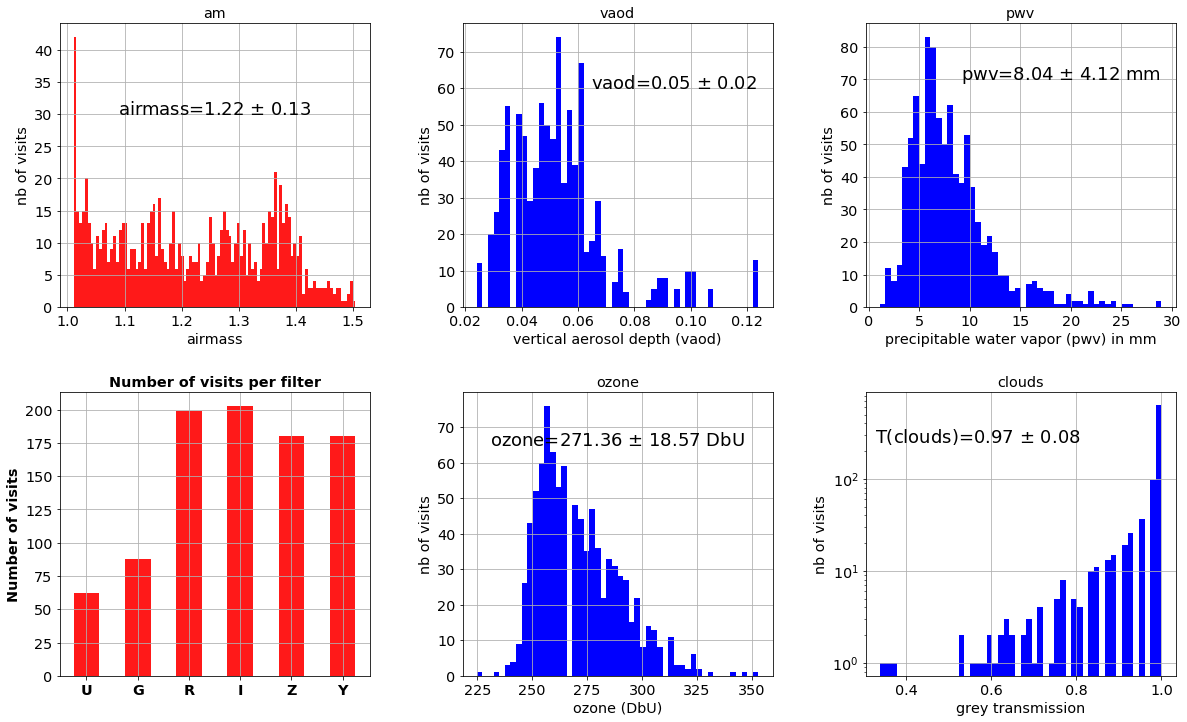

In [213]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,12))
#airmasses
#=========
m,sig,zmin,zmax=df["am"].describe()["mean"],df["am"].describe()["std"],df["am"].describe()["min"],df["am"].describe()["max"]
thelabel="airmass={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist("am",bins=100,color='r',alpha=0.9,label=thelabel,ax=axes[0,0])
#axarr = frame.hist(column='Age', by = 'Survived', sharex=True, sharey=True, layout = (2, 1))
for ax in axarr.flatten():
    ax.set_xlabel("airmass")
    ax.set_ylabel("nb of visits")
    ax.text((zmin+zmax)/2., 30, thelabel, ha='center',fontsize=18)
# VAOD
#=-----
m,sig,amin,amax=df["vaod"].describe()["mean"],df["vaod"].describe()["std"],df["vaod"].describe()["min"],df["vaod"].describe()["max"]
thelabel="vaod={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('vaod',bins=50,color='b',ax=axes[0,1])
for ax in axarr.flatten():
    ax.set_xlabel("vertical aerosol depth (vaod)")
    ax.set_ylabel("nb of visits")
    ax.text((amin+amax)/2.+0.02, 60, thelabel, ha='center',fontsize=18)
# PWV
#-----
m,sig,pmin,pmax=df["pwv"].describe()["mean"],df["pwv"].describe()["std"],df["pwv"].describe()["min"],df["pwv"].describe()["max"]
thelabel="pwv={:3.2f} $\pm$ {:3.2f} mm".format(m,sig)
axarr=df.hist('pwv',bins=50,color='b',ax=axes[0,2])
for ax in axarr.flatten():
    ax.set_xlabel("precipitable water vapor (pwv) in mm")
    ax.set_ylabel("nb of visits")
    ax.text((pmin+pmax)/2.+4, 70, thelabel, ha='center',fontsize=18)
# Filter
#------
#axarr=df.hist("f",bins=12,color='r',alpha=0.9,ax=axes[1,0])
#for ax in axarr.flatten():
#    ax.set_xlabel("Filter color")
#    ax.set_ylabel("nb of visits")
#    ax.set_xticks(np.arange(6))
#    ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
N_u,N_g,N_r=df["f"][df.f==1].describe()["count"],df["f"][df.f==2].describe()["count"],df["f"][df.f==3].describe()["count"]
N_i,N_z,N_y=df["f"][df.f==4].describe()["count"],df["f"][df.f==5].describe()["count"],df["f"][df.f==6].describe()["count"]
Nobs=np.array([N_u,N_g,N_r,N_i,N_z,N_y])    
ind = np.arange(6)  # the x locations for the groups
width = 0.5  # the width of the bars
ax=axes[1,0]
rects1 = ax.bar(ind , Nobs, width, color='r',alpha=0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of visits',fontweight='bold')
ax.set_title('Number of visits per filter',fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
ax.grid()    

# Ozone
#-------
m,sig,omin,omax=df["ozone"].describe()["mean"],df["ozone"].describe()["std"],df["ozone"].describe()["min"],df["ozone"].describe()["max"]
thelabel="ozone={:3.2f} $\pm$ {:3.2f} DbU".format(m,sig)
axarr=df.hist('ozone',bins=50,color='b',ax=axes[1,1])
for ax in axarr.flatten():
    ax.set_xlabel("ozone (DbU)")
    ax.set_ylabel("nb of visits")
    ax.text((omin+omax)/2., 65, thelabel, ha='center',fontsize=18)
# Clouds
#-------
m,sig,cmin,cmax=df["clouds"].describe()["mean"],df["clouds"].describe()["std"],df["clouds"].describe()["min"],df["clouds"].describe()["max"]
thelabel="T(clouds)={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('clouds',bins=50,color='b',ax=axes[1,2])
for ax in axarr.flatten():
    ax.set_xlabel("grey transmission")
    ax.set_ylabel("nb of visits")
    ax.set_yscale('log')
    ax.text((cmin+cmax)/2.-0.1, 250, thelabel, ha='center',fontsize=18)





In [ ]:
df.hist('mag',bins=50)

In [ ]:
#df.plot.scatter(x='mag',y='magerr',grid=True)

In [ ]:
df.loc[(df.f == 1) & (df.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)

In [ ]:
len(all_data)

In [ ]:
NBSED=len(all_data)

# Concatenate All Data Samples

In [ ]:
MAG_CUT=[-9.,-13.,-13.,-13.,-13.,-13.,-13.]

In [ ]:
all_df = []
for ised in np.arange(NBSED):
    df2=pd.DataFrame(all_data[ised])
    df2.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    all_df.append(df2)   
    #df2.loc[(df2.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)
dft=pd.concat(all_df)


# The Most bright sources

In [ ]:
for ised in np.arange(NBSED):
#for ised in np.arange(10):
    thedf=pd.DataFrame(all_data[ised])
    thedf.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    #print(thedf)
    themag=thedf["mag"].values
    thefilt=thedf["f"].values
    all_u_idx=np.where(thefilt==1)[0]
    all_g_idx=np.where(thefilt==2)[0]
    all_r_idx=np.where(thefilt==3)[0]
    all_i_idx=np.where(thefilt==4)[0]
    all_z_idx=np.where(thefilt==5)[0]
    all_y_idx=np.where(thefilt==6)[0]
    themax_u=themag[all_u_idx].max()
    themax_g=themag[all_g_idx].max()
    themax_r=themag[all_r_idx].max()
    themax_i=themag[all_i_idx].max()
    themax_z=themag[all_z_idx].max()
    themax_y=themag[all_y_idx].max()
    if  themax_u<MAG_CUT[0] and themax_g<MAG_CUT[1] and themax_r<MAG_CUT[2] and themax_i<MAG_CUT[3] and themax_z<MAG_CUT[4] and themax_y<MAG_CUT[5]: 
        print(ised,themax_u,themax_g,themax_r,themax_i,themax_z,themax_y)

In [ ]:
thedf=pd.DataFrame(all_data[2113])
thedf.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

In [ ]:
thedf.head()

## In U filter
## -------------

In [ ]:
thedfu=thedf.loc[(thedf.f == 1)].drop('f', axis=1)

In [ ]:
theX=thedfu["vaod"].values
theY=thedfu["mag"].values
theEY=thedfu["magerr"].values
thedfu.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfu.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
#print(theCov)

In [ ]:
corr=thedfu.loc[(thedf.f == 1) ].corr()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in U filter', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
theX=thedfu["clouds"].values
theY=thedfu["mag"].values
theEY=thedfu["magerr"].values
thedfu.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfu.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## The G filter
## -------------

In [ ]:
thedfg=thedf.loc[(thedf.f == 2)].drop('f', axis=1)

In [ ]:
theX=thedfg["vaod"].values
theY=thedfg["mag"].values
theEY=thedfg["magerr"].values
thedfg.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfg.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter g',color='g',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
#thedf.loc[(thedf.f == 2) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter g',color='g',marker='o',grid=True)

In [ ]:
corr=thedfg.loc[(thedf.f == 2) ].corr()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in G filter', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
theX=thedfg["clouds"].values
theY=thedfg["mag"].values
theEY=thedfg["magerr"].values
thedfg.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfg.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter g',color='g',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## The R filter
## -----------

In [ ]:
thedfr=thedf.loc[(thedf.f == 3)].drop('f', axis=1)

In [ ]:
theX=thedfr["vaod"].values
theY=thedfr["mag"].values
theEY=thedfr["magerr"].values
thedfr.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfr.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter r',color='r',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
corr=thedfr.loc[(thedf.f == 3) ].corr()

In [ ]:
#thedf.loc[(thedf.f == 3) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter r',color='r',marker='o',grid=True)

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in R filter', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
theX=thedfr["clouds"].values
theY=thedfr["mag"].values
theEY=thedfr["magerr"].values
thedfr.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfr.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter r',color='r',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## Filter in I
## ---------------------------------

In [ ]:
thedfi=thedf.loc[(thedf.f == 4)].drop('f', axis=1)

In [ ]:
theX=thedfi["vaod"].values
theY=thedfi["mag"].values
theEY=thedfi["magerr"].values
thedfi.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfi.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter i',color='orange',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
corr=thedfi.loc[(thedf.f == 4) ].corr()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in I filter', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
#thedf.loc[(thedf.f == 4) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter i',color='orange',marker='o',grid=True)

In [ ]:
theX=thedfi["clouds"].values
theY=thedfi["mag"].values
theEY=thedfi["magerr"].values
thedfi.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfi.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter i',color='orange',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## Filter Z
## ---------

In [ ]:
thedfz=thedf.loc[(thedf.f == 5)].drop('f', axis=1)

In [ ]:
theX=thedfz["vaod"].values
theY=thedfz["mag"].values
theEY=thedfz["magerr"].values
thedfz.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfz.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter z',color='grey',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
corr=thedfz.loc[(thedf.f == 5) ].corr()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in Z filter', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
#thedf.loc[(thedf.f == 5) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter z',color='grey',marker='o',grid=True)

In [ ]:
theX=thedfz["clouds"].values
theY=thedfz["mag"].values
theEY=thedfz["magerr"].values
thedfz.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfz.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter z',color='grey',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

## The Y filter

In [ ]:
thedfy=thedf.loc[(thedf.f == 6)].drop('f', axis=1)

In [ ]:
theX=thedfy["vaod"].values
theY=thedfy["mag"].values
theEY=thedfy["magerr"].values
thedfy.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfy.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter y',color='black',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
corr=thedfy.loc[(thedf.f == 6) ].corr()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix in Y filter', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
#thedf.loc[(thedf.f == 6) ].plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter y',color='black',marker='o',grid=True)

In [ ]:
theX=thedfy["pwv"].values
theY=thedfy["mag"].values
theEY=thedfy["magerr"].values
thedfy.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfy.plot.scatter(x='pwv',y='mag',yerr='magerr',title='pwv vs mag for filter y',color='black',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
theX=thedfy["clouds"].values
theY=thedfy["mag"].values
theEY=thedfy["magerr"].values
thedfy.corr()

In [ ]:
linregress(theX,theY)

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
thedfy.plot.scatter(x='clouds',y='mag',yerr='magerr',title='clouds vs mag for filter y',color='black',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

# Plot VAOD vs Magnitude

In [ ]:
thedfu=thedf.loc[(thedf.f == 1)].drop('f', axis=1)

In [ ]:
dfu=dft.loc[(dft.f == 1) & (dft.mag < -11 )].drop('f', axis=1)

In [ ]:
theX=dfu["vaod"].values
theY=dfu["mag"].values
theEY=dfu["magerr"].values
dfu.corr()

In [ ]:
theZ,theCov=np.polyfit(theX,theY,1,w=1/theEY,cov=True)
pol = np.poly1d(theZ)
Xfit=np.linspace(theX.min(),theX.max(),50)
Yfit=pol(Xfit)

In [ ]:
dfu.plot.scatter(x='vaod',y='mag',yerr='magerr',title='vaod vs mag for filter u',color='b',marker='o',grid=True)
plt.plot(Xfit,Yfit,'r-')

In [ ]:
corr=dfu.loc[(thedf.f == 1) ].corr()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='hot', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix un U filter', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
dft.loc[(dft.f == 1) & (dft.mag < -11 )].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter u',color='b',marker='.',grid=True)

In [ ]:
dft.loc[(dft.f == 2) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter g',color='g',marker='.',grid=True)

In [ ]:
dft.loc[(dft.f == 3) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter r',color='r',marker='.',grid=True)

In [ ]:
dft.loc[(dft.f == 4)& (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter i',color='orange',marker='.',grid=True)

In [ ]:
dft.loc[(dft.f == 5) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter z',color='grey',marker='.',grid=True)

In [ ]:
dft.loc[(dft.f == 6) & (dft.mag<-14)].plot.scatter(x='mag',y='vaod',title='vaod vs mag for filter Y',color='k',marker='.',grid=True)

# Effect of Precipitable water vapor

In [ ]:
dft.loc[(dft.f == 6) & (dft.mag<-14)].plot.scatter(x='mag',y='pwv',title='pwv vs mag for filter Y',color='k',marker='.',grid=True)